# Kernels for hand-made SVM

**In this homework we will again look at SVM kernels and will write and test rbf kernel for our own implementation.**

In [1]:
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for our SVM class"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.predict(xy).reshape(X.shape)
    # plot decision boundary and margins
    CS = ax.contourf(X, Y, P, origin='lower', cmap='autumn', alpha=0.1)
    plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:
from sklearn.datasets import make_circles

from sklearn.svm import SVC # "Support vector classifier"

X, y = make_circles(150, factor=.1, noise=.1, random_state=42)

X_test, y_test = X[100:], y[100:]
X, y = X[:100], y[:100]

### Sklearn realization:

Test accuracy:  0.64


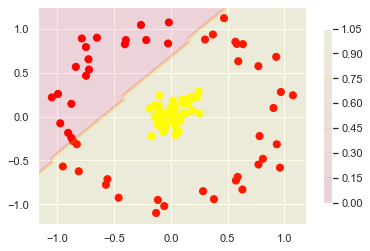

In [4]:
clf = SVC(kernel='linear').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Test accuracy:  1.0


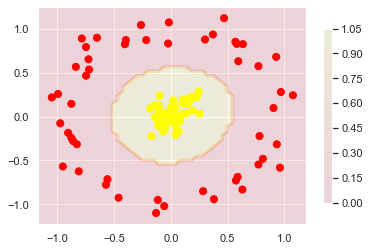

In [5]:
clf = SVC(kernel='rbf').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Let's look at our realization

### You need to open svm.py file and add all missed lines.

Linear SVM __primal__ optimization problem can be formulated as

$$ \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w X_i - b)) + \lambda ||w||_2 \to \min_w $$

This problem can be solved with gradient or sub-gradien methods.

-----
Whereas __dual__ optimization problem formulates as follows:

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i (X_i \cdot X_j ) y_j c_j \to \max_{c_1,...,c_n} \\ \text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

Where $W = \sum_{i=1}^n c_i y_i X_i$.

In this quadratic optimization problem we can use kernel trick: <br/>
introduce fucntion $K(X_i, X_j) = \phi (X_i) \phi (X_j)$ and change dot products in our optimization problem

Then we have 

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i K(X_i, X_j) y_j c_j \to \max_{c_1,...,c_n} \\
\text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

$W = \sum_{i=1}^n c_i y_i \phi(X_i)$

In quadratic programming we can straightforwardly add kernel function, but it is not that simple, if we want to use gradient algorithms.

----
However primal optimization problem with kernels can be formulated like (see [Olivier Chapelle, 2006](https://www.cs.utah.edu/~piyush/teaching/svm-solving-primal.pdf)):

$$f(x) = \sum_{i=1}^n \beta_i K(x_i, x)$$

$$K: K_{i,j} = K(x_i, x_j)$$

$$ \lambda \vec{\beta^T} K \vec{\beta} + \sum_{i=1}^n L(y_i, K_i^T \vec{\beta}) \to \min_{\vec{\beta}}$$

where L is Hinge loss: $L(y_i, K_i^T \vec{\beta}) = \max(0, 1 - y_i (K_i^T \vec{\beta}))$

#### Radial basis function kernel.

####  The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as:

## $K(x,x') = \exp \big{[}- \frac{||x-x'||^2}{2 \sigma^2} \big{]}.$

### Let's look how it works:

In [12]:
# uncomment this cell if you are working in colab
# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/assignment0_03_SVM/svm.py -nc

In [13]:
from svm import SVM, rbf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
y[y==0] = -1 # for convenience with formulas
y_test[y_test==0] = -1

Epoch 0, Loss: 0.3490541517734528
Epoch 1, Loss: 0.3418896675109863
Epoch 2, Loss: 0.2773051545023918
[[ 1.03329943  0.26129937]
 [-0.04365467  1.11732641]
 [-1.0606362   0.16925611]
 [ 1.03726801 -0.24159265]
 [ 0.08268427 -0.1030361 ]
 [ 0.8276634   0.5025135 ]
 [-0.01141324 -0.04226541]
 [-0.11222372  0.05105368]
 [ 1.08119715  0.31202377]
 [ 0.57202819 -0.78619651]
 [-0.2503514  -0.89461179]
 [ 0.01259577 -0.1614955 ]
 [-0.67876716 -0.98808241]
 [-0.16473503  0.09540256]
 [-0.60170908 -0.69737239]
 [ 0.01966838 -0.05349069]
 [ 0.38873024 -0.82876974]
 [ 0.04453951  0.07004531]
 [ 0.07051516  0.11828414]
 [ 0.20124682 -1.03488837]
 [ 0.21406685  0.2038806 ]
 [-1.13652401 -0.33370915]
 [ 0.26657532 -1.10893838]
 [ 0.10796953  0.16181126]
 [-0.70733865 -0.77139495]
 [-0.16267217  0.26566351]
 [-0.12048043  0.12484482]
 [ 0.00431278  0.05367316]
 [-0.23071166  1.00266952]
 [ 0.11870144 -0.91077257]
 [ 0.2030661  -0.09591354]
 [-0.08516088  0.03778241]
 [-1.20283042  0.19887888]
 [ 0.03

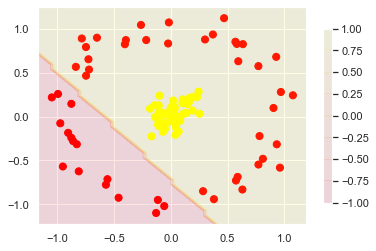

In [20]:
clf = SVM(epochs=3, lr=1, batch_size=20, verbose=True)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

tensor([0.0596, 0.0463, 0.0586, 0.0796, 0.0793, 0.0792, 0.0794, 0.0488, 0.0551,
        0.0796, 0.0778, 0.0533, 0.0784, 0.0792, 0.0537, 0.0795, 0.0569, 0.0552,
        0.0530, 0.0501], grad_fn=<ViewBackward>)
tensor([0.3303, 0.2556, 0.4572, 0.3164, 0.6458, 0.3038, 0.6300, 0.6120, 0.5576,
        0.4244, 0.6085, 0.5012, 0.6476, 0.3670, 0.4712, 0.4716, 0.5096, 0.5991,
        0.6454, 0.5171], grad_fn=<ViewBackward>)
tensor([0.3440, 0.3943, 0.4183, 0.6154, 0.3782, 0.5967, 0.6079, 0.3549, 0.3002,
        0.6153, 0.3586, 0.6132, 0.6082, 0.2882, 0.3877, 0.5583, 0.5978, 0.3786,
        0.6096, 0.5791], grad_fn=<ViewBackward>)
tensor([1.0545, 1.6795, 1.6733, 1.0635, 1.1120, 1.0683, 0.9411, 0.9464, 1.1215,
        1.1254, 1.6821, 1.6379, 1.6804, 1.6832, 1.6904, 1.1704, 1.1852, 1.6661,
        0.8427, 1.1658], grad_fn=<ViewBackward>)
tensor([-1.0465, -0.6983, -0.7552, -1.0477, -1.0363, -1.0519, -0.9201, -1.0488,
        -1.0891, -0.7475, -1.0525, -0.8768, -1.0446, -1.0519, -1.0664, -1.0542,
    

tensor([-0.3443,  2.7221,  2.7392, -1.0076,  2.7266, -0.3559, -0.9994,  2.5992,
         2.7527,  2.7482, -0.3249,  2.5423, -1.3973,  0.1382,  2.7164,  2.7093,
         2.6484, -0.0874,  2.4570, -0.7033], grad_fn=<ViewBackward>)
tensor([ 1.1080,  1.1049, -1.7605, -2.1737,  1.1017, -1.3573,  0.6479, -1.4649,
         0.9787, -0.7930,  1.0279, -2.7830, -1.5132, -2.0069,  1.0926,  1.0383,
        -1.6617,  0.9553,  0.8325, -1.4665], grad_fn=<ViewBackward>)
tensor([-1.8181, -0.7676,  1.8329, -0.9248,  2.0790, -0.6867, -0.6545,  2.1681,
        -0.8778,  2.2052,  1.8513,  2.0806,  2.1135,  2.1488,  2.1347, -0.3740,
        -1.5719, -0.5575, -1.5536,  1.9764], grad_fn=<ViewBackward>)
Epoch 36, Loss: 0.020638850796967746
tensor([-1.7488,  0.4872, -1.7479,  0.3123,  0.3864,  0.4621, -2.7352, -2.0450,
        -2.4872,  0.4116,  0.4405,  0.4348, -2.3476,  0.5042,  0.4788, -2.6523,
        -1.9329, -2.6093, -2.6171, -1.9355], grad_fn=<ViewBackward>)
tensor([ 0.6390,  3.3815,  3.4072,  3.4862,  2.

tensor([-1.1865, -0.6895, -0.1372, -0.4238, -0.7165, -0.8367, -0.0981,  3.0001,
         3.1179, -0.2533, -1.0906,  3.0776, -0.7787, -0.3796, -0.1714, -0.2662,
         3.2019,  2.7420,  3.2021, -1.3375], grad_fn=<ViewBackward>)
Epoch 64, Loss: 0.05226411763578653
tensor([ 0.4040, -2.6904, -2.6555, -2.3226,  0.5626, -3.1031, -2.8576, -2.0394,
         0.6744,  0.6759, -2.4528, -3.3829, -2.6507,  0.5616, -2.1573, -2.1699,
        -1.8634,  0.6119,  0.6807, -1.9844], grad_fn=<ViewBackward>)
tensor([-0.8371, -0.3207,  2.7810, -0.9729,  2.8160,  2.9662,  3.0551,  2.9929,
         2.9774, -0.7590, -0.4106, -1.0949, -1.5318,  3.0108,  2.8833,  2.9448,
         3.0089,  2.6355, -0.9012,  2.9817], grad_fn=<ViewBackward>)
tensor([-2.6992, -1.6517, -1.4512,  1.6148, -1.8391,  1.6290, -2.3205,  1.6163,
         1.6454,  1.3232,  1.4478, -1.2301, -2.0932, -1.8219, -1.2724, -2.3055,
         1.6834, -2.2379,  1.6529,  1.4692], grad_fn=<ViewBackward>)
tensor([ 1.4996, -1.1783,  1.6501, -1.5182,  1.5

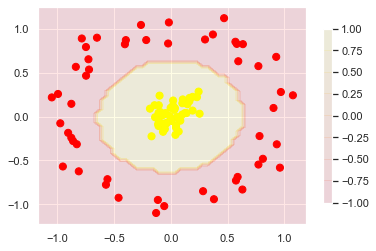

In [10]:
clf = SVM(epochs=100, lr=0.1, batch_size=20, verbose=True, kernel_function=rbf)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [11]:
assert accuracy_score(y_test, pred) > 0.95

## Our model with rbf kernel can learn this dataset too.